<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(ds_train , ds_test) , ds_info = tfds.load('mnist',
                                           split = ['train','test'],
                                           shuffle_files = True,
                                           as_supervised = True,
                                           with_info = True
                                           )

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


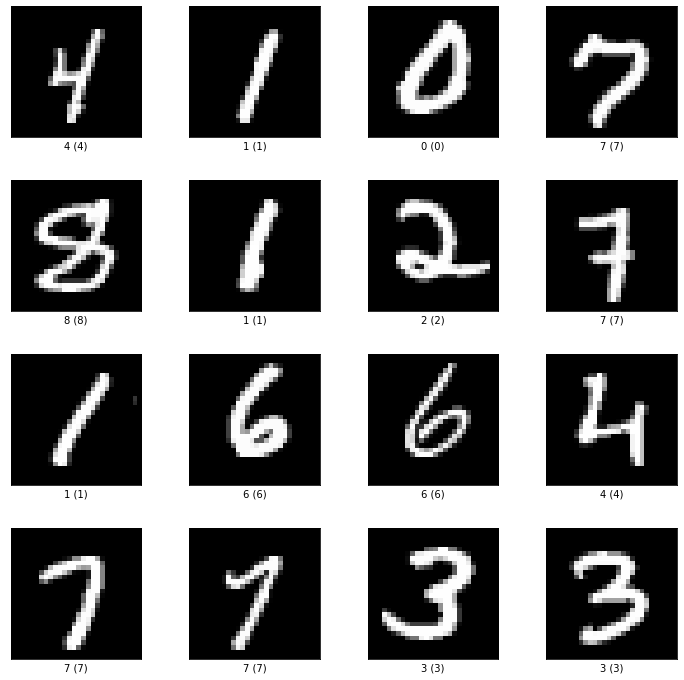

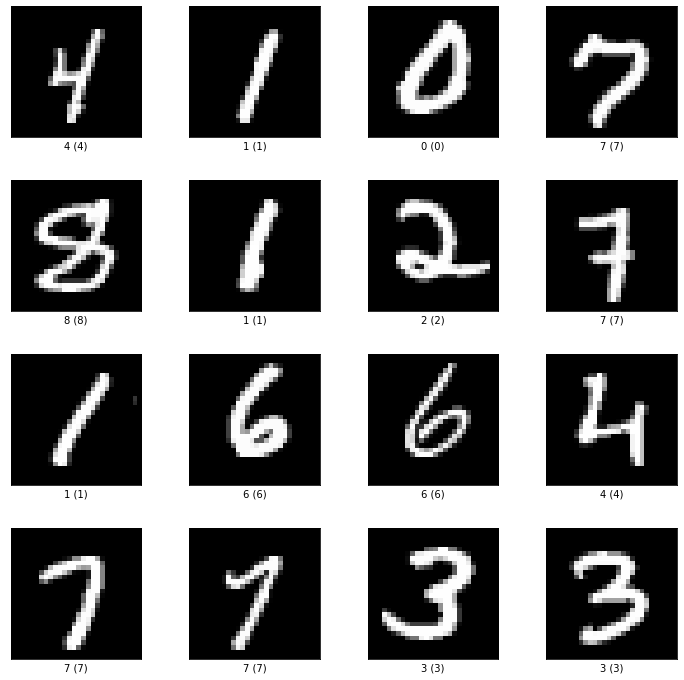

In [3]:
tfds.show_examples(ds_train , ds_info , rows = 4 , cols = 4)

In [4]:
def normalize_image(image , label):
  return tf.cast(image , tf.float32)/255.0 , label

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
def format_data(ds , batchsize = BATCH_SIZE , shuffle = True):
  ds = ds.map(normalize_image , num_parallel_calls = AUTOTUNE)
  ds = ds.cache()
  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.batch(batchsize)
  ds = ds.prefetch(AUTOTUNE)

  return ds

In [7]:
train_ds = format_data(ds_train)
test_ds = format_data(ds_test, shuffle = False)

## Visualizing random images

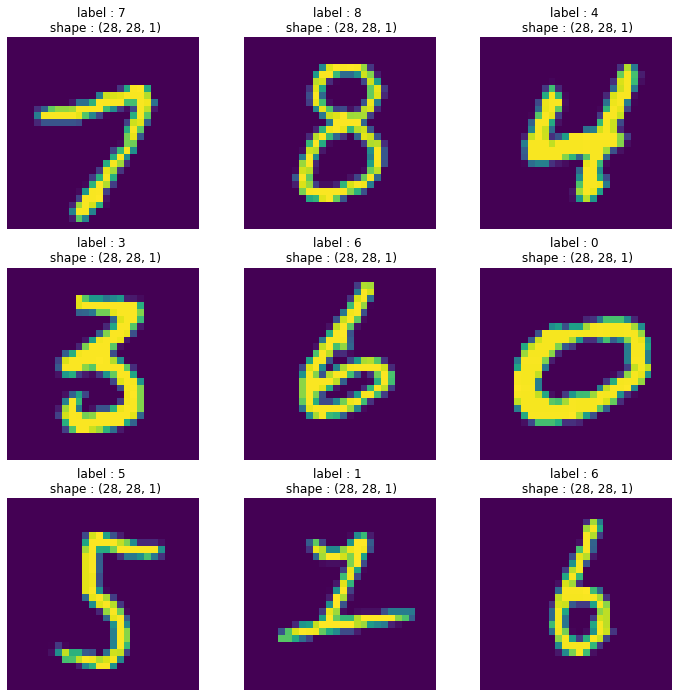

In [41]:
import random 
random_index = random.randint(0,len(ds_train)-9)
examples = ds_train.skip(random_index).take(9)

plt.figure(figsize = (12,12))
for index , image in enumerate(examples,1):
  plt.subplot(3,3, index)
  plt.title(f"label : {image[1].numpy()} \n shape : {image[0].shape}")
  plt.imshow(tf.squeeze(image[0]))
  plt.axis(False)

1. Images are numbers between 0 and 9
2. Image shapes are 28,28,1

In [53]:
def plot_loss_curve(history):
  history_df = pd.DataFrame(history.history)
  history_df['epochs'] = range(1,len(history_df)+1)

  plt.figure(figsize = (16,8))
  plt.subplot(1,2,1)
  plt.plot(history_df['epochs'] , history_df['accuracy'] , label = 'train accuracy')
  plt.plot(history_df['epochs'] , history_df['val_accuracy'] , label = 'validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history_df['epochs'] , history_df['loss'] , label = 'train loss')
  plt.plot(history_df['epochs'] , history_df['val_loss'] , label = 'validation loss')
  plt.legend()

## Base Model

In [69]:
FILTERS = 3
model_0 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10 , activation = 'softmax')
])

In [70]:
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'],
                run_eagerly = True)

In [71]:
FILEPATH = 'saved_model/checkpoint'
history_0 = model_0.fit(train_ds,
                      steps_per_epoch = len(train_ds)//BATCH_SIZE,
                      epochs = 30,
                      validation_data = test_ds,
                      validation_steps = len(test_ds)//BATCH_SIZE,
                      callbacks = [tf.keras.callbacks.ModelCheckpoint(FILEPATH,
                                                                      save_best_only = True)]
                      )

Epoch 1/30
58/58 [==============================] - ETA: 0s - loss: 1.7261 - accuracy: 0.5027INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 1.7261 - accuracy: 0.5027 - val_loss: 1.1743 - val_accuracy: 0.7882
Epoch 2/30
58/58 [==============================] - ETA: 0s - loss: 1.0306 - accuracy: 0.7926INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 1.0306 - accuracy: 0.7926 - val_loss: 0.7987 - val_accuracy: 0.8750
Epoch 3/30
56/58 [===========================>..] - ETA: 0s - loss: 0.7798 - accuracy: 0.8376INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 2s 26ms/step - loss: 0.7784 - accuracy: 0.8384 - val_loss: 0.6360 - val_accuracy: 0.8750
Epoch 4/30
57/58 [============================>.] - ETA: 0s - loss: 0.6713 - accuracy: 0.8443INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.6690 - accuracy: 0.8448 - val_loss: 0.5448 - val_accuracy: 0.9062
Epoch 5/30
56/58 [===========================>..] - ETA: 0s - loss: 0.5877 - accuracy: 0.8532INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.5838 - accuracy: 0.8551 - val_loss: 0.4986 - val_accuracy: 0.9097
Epoch 6/30
56/58 [===========================>..] - ETA: 0s - loss: 0.5440 - accuracy: 0.8711INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 2s 26ms/step - loss: 0.5394 - accuracy: 0.8734 - val_loss: 0.4573 - val_accuracy: 0.9062
Epoch 7/30
56/58 [===========================>..] - ETA: 0s - loss: 0.4901 - accuracy: 0.8772INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.4885 - accuracy: 0.8772 - val_loss: 0.4292 - val_accuracy: 0.9062
Epoch 8/30
55/58 [===========================>..] - ETA: 0s - loss: 0.4745 - accuracy: 0.8761INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.4684 - accuracy: 0.8793 - val_loss: 0.4031 - val_accuracy: 0.9132
Epoch 9/30
55/58 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.8750INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.4580 - accuracy: 0.8761 - val_loss: 0.3826 - val_accuracy: 0.9132
Epoch 10/30
56/58 [===========================>..] - ETA: 0s - loss: 0.4270 - accuracy: 0.8828INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.4257 - accuracy: 0.8836 - val_loss: 0.3679 - val_accuracy: 0.9167
Epoch 11/30
58/58 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.8917INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.4222 - accuracy: 0.8917 - val_loss: 0.3620 - val_accuracy: 0.9097
Epoch 12/30
58/58 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.8998INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 24ms/step - loss: 0.3868 - accuracy: 0.8998 - val_loss: 0.3501 - val_accuracy: 0.9167
Epoch 13/30
58/58 [==============================] - 1s 17ms/step - loss: 0.3822 - accuracy: 0.9009 - val_loss: 0.3514 - val_accuracy: 0.9167
Epoch 14/30
56/58 [===========================>..] - ETA: 0s - loss: 0.4056 - accuracy: 0.8845INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 2s 26ms/step - loss: 0.4083 - accuracy: 0.8842 - val_loss: 0.3383 - val_accuracy: 0.9132
Epoch 15/30
57/58 [============================>.] - ETA: 0s - loss: 0.3903 - accuracy: 0.8997INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.3887 - accuracy: 0.8998 - val_loss: 0.3320 - val_accuracy: 0.9236
Epoch 16/30
57/58 [============================>.] - ETA: 0s - loss: 0.3840 - accuracy: 0.8953INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.3817 - accuracy: 0.8960 - val_loss: 0.3157 - val_accuracy: 0.9201
Epoch 17/30
58/58 [==============================] - 1s 17ms/step - loss: 0.3999 - accuracy: 0.8928 - val_loss: 0.3200 - val_accuracy: 0.9306
Epoch 18/30
56/58 [===========================>..] - ETA: 0s - loss: 0.3485 - accuracy: 0.9012INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.3475 - accuracy: 0.9019 - val_loss: 0.3141 - val_accuracy: 0.9236
Epoch 19/30
56/58 [===========================>..] - ETA: 0s - loss: 0.3676 - accuracy: 0.9046INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.3685 - accuracy: 0.9036 - val_loss: 0.3134 - val_accuracy: 0.9236
Epoch 20/30
57/58 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8991INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 38s 670ms/step - loss: 0.3565 - accuracy: 0.8998 - val_loss: 0.3128 - val_accuracy: 0.9271
Epoch 21/30
57/58 [============================>.] - ETA: 0s - loss: 0.3624 - accuracy: 0.9068INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.3605 - accuracy: 0.9068 - val_loss: 0.3003 - val_accuracy: 0.9236
Epoch 22/30
55/58 [===========================>..] - ETA: 0s - loss: 0.3615 - accuracy: 0.8926INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.3594 - accuracy: 0.8933 - val_loss: 0.2976 - val_accuracy: 0.9201
Epoch 23/30
58/58 [==============================] - ETA: 0s - loss: 0.3698 - accuracy: 0.8912INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 24ms/step - loss: 0.3698 - accuracy: 0.8912 - val_loss: 0.2964 - val_accuracy: 0.9271
Epoch 24/30
57/58 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.9112INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.3219 - accuracy: 0.9106 - val_loss: 0.2885 - val_accuracy: 0.9271
Epoch 25/30
57/58 [============================>.] - ETA: 0s - loss: 0.3483 - accuracy: 0.9090INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 25ms/step - loss: 0.3474 - accuracy: 0.9089 - val_loss: 0.2838 - val_accuracy: 0.9306
Epoch 26/30
58/58 [==============================] - 1s 16ms/step - loss: 0.3637 - accuracy: 0.9030 - val_loss: 0.2914 - val_accuracy: 0.9306
Epoch 27/30
58/58 [==============================] - 1s 17ms/step - loss: 0.3274 - accuracy: 0.9019 - val_loss: 0.2927 - val_accuracy: 0.9306
Epoch 28/30
58/58 [==============================] - 1s 16ms/step - loss: 0.3337 - accuracy: 0.9116 - val_loss: 0.2894 - val_accuracy: 0.9340
Epoch 29/30
57/58 [============================>.] - ETA: 0s - loss: 0.3453 - accuracy: 0.9041INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 24ms/step - loss: 0.3424 - accuracy: 0.9046 - val_loss: 0.2819 - val_accuracy: 0.9306
Epoch 30/30
57/58 [============================>.] - ETA: 0s - loss: 0.3311 - accuracy: 0.9035INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 1s 26ms/step - loss: 0.3298 - accuracy: 0.9041 - val_loss: 0.2807 - val_accuracy: 0.9236


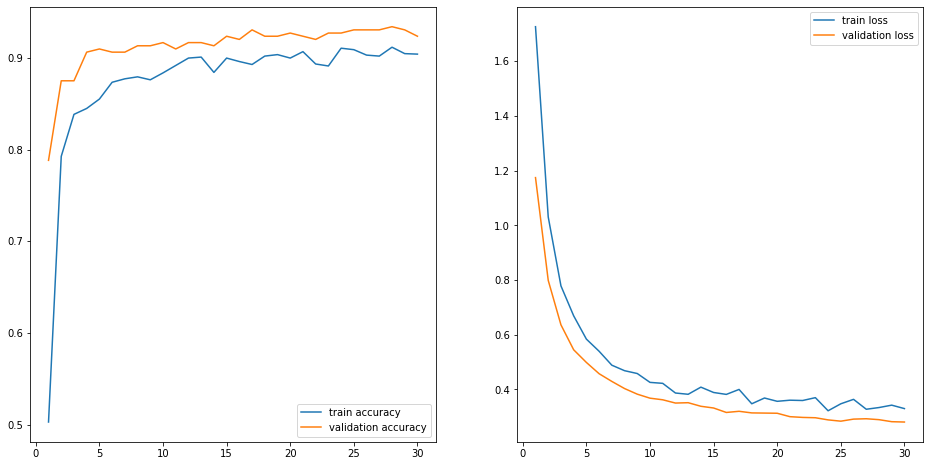

In [74]:
plot_loss_curve(history_0)

In [81]:
loaded_model = tf.keras.models.load_model(FILEPATH)

In [82]:
loaded_model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.9147


[0.3107687532901764, 0.9146999716758728]

## Model 1 - Adding VGG block

In [83]:
FILTERS = 3
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(FILTERS, (3,3), input_shape = (28,28,1), activation = 'relu'),
                               tf.keras.layers.Conv2D(FILTERS, (3,3), activation = 'relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Dropout(0.1),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10 , activation = 'softmax')
])

In [84]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'],
                run_eagerly = True)

In [85]:
history_1 = model_1.fit(train_ds,
                      steps_per_epoch = len(train_ds)//BATCH_SIZE,
                      epochs = 30,
                      validation_data = test_ds,
                      validation_steps = len(test_ds)//BATCH_SIZE,
                      callbacks = [tf.keras.callbacks.ModelCheckpoint(FILEPATH,
                                                                      save_best_only = True)]
                      )

Epoch 1/30
57/58 [============================>.] - ETA: 0s - loss: 1.8455 - accuracy: 0.3684INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 62ms/step - loss: 1.8296 - accuracy: 0.3739 - val_loss: 1.7440 - val_accuracy: 0.5833
Epoch 2/30
58/58 [==============================] - ETA: 0s - loss: 0.8023 - accuracy: 0.7543INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 7s 129ms/step - loss: 0.8023 - accuracy: 0.7543 - val_loss: 1.1928 - val_accuracy: 0.7951
Epoch 3/30
58/58 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.8367INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 7s 116ms/step - loss: 0.5547 - accuracy: 0.8367 - val_loss: 0.8369 - val_accuracy: 0.8368
Epoch 4/30
58/58 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.8648INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 6s 107ms/step - loss: 0.4399 - accuracy: 0.8648 - val_loss: 0.5867 - val_accuracy: 0.8819
Epoch 5/30
58/58 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8858INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 6s 102ms/step - loss: 0.3908 - accuracy: 0.8858 - val_loss: 0.4396 - val_accuracy: 0.8993
Epoch 6/30
57/58 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.9090INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 5s 79ms/step - loss: 0.3178 - accuracy: 0.9073 - val_loss: 0.3370 - val_accuracy: 0.9167
Epoch 7/30
58/58 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.9025INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 6s 111ms/step - loss: 0.3193 - accuracy: 0.9025 - val_loss: 0.2835 - val_accuracy: 0.9201
Epoch 8/30
57/58 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.9106INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 70ms/step - loss: 0.2985 - accuracy: 0.9111 - val_loss: 0.2498 - val_accuracy: 0.9201
Epoch 9/30
57/58 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.9161INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 61ms/step - loss: 0.2706 - accuracy: 0.9165 - val_loss: 0.2185 - val_accuracy: 0.9306
Epoch 10/30
57/58 [============================>.] - ETA: 0s - loss: 0.2615 - accuracy: 0.9128INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 63ms/step - loss: 0.2640 - accuracy: 0.9122 - val_loss: 0.1896 - val_accuracy: 0.9444
Epoch 11/30
57/58 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9298INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 64ms/step - loss: 0.2179 - accuracy: 0.9305 - val_loss: 0.1886 - val_accuracy: 0.9444
Epoch 12/30
57/58 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9216INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 62ms/step - loss: 0.2658 - accuracy: 0.9208 - val_loss: 0.1796 - val_accuracy: 0.9410
Epoch 13/30
57/58 [============================>.] - ETA: 0s - loss: 0.2361 - accuracy: 0.9260INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 62ms/step - loss: 0.2337 - accuracy: 0.9267 - val_loss: 0.1679 - val_accuracy: 0.9514
Epoch 14/30
57/58 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9326INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 67ms/step - loss: 0.2318 - accuracy: 0.9332 - val_loss: 0.1635 - val_accuracy: 0.9479
Epoch 15/30
58/58 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9337INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 61ms/step - loss: 0.2316 - accuracy: 0.9337 - val_loss: 0.1554 - val_accuracy: 0.9514
Epoch 16/30
58/58 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.9197INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 62ms/step - loss: 0.2414 - accuracy: 0.9197 - val_loss: 0.1545 - val_accuracy: 0.9410
Epoch 17/30
57/58 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9309INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 65ms/step - loss: 0.2186 - accuracy: 0.9310 - val_loss: 0.1519 - val_accuracy: 0.9514
Epoch 18/30
58/58 [==============================] - 2s 40ms/step - loss: 0.1895 - accuracy: 0.9413 - val_loss: 0.1543 - val_accuracy: 0.9479
Epoch 19/30
57/58 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9337INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 3s 60ms/step - loss: 0.2023 - accuracy: 0.9337 - val_loss: 0.1489 - val_accuracy: 0.9479
Epoch 20/30
58/58 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.9353INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 66ms/step - loss: 0.2076 - accuracy: 0.9353 - val_loss: 0.1380 - val_accuracy: 0.9549
Epoch 21/30
58/58 [==============================] - 2s 41ms/step - loss: 0.1948 - accuracy: 0.9391 - val_loss: 0.1454 - val_accuracy: 0.9549
Epoch 22/30
58/58 [==============================] - 2s 41ms/step - loss: 0.2179 - accuracy: 0.9321 - val_loss: 0.1600 - val_accuracy: 0.9514
Epoch 23/30
57/58 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.9419INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 4s 63ms/step - loss: 0.1903 - accuracy: 0.9413 - val_loss: 0.1243 - val_accuracy: 0.9653
Epoch 24/30
58/58 [==============================] - 2s 43ms/step - loss: 0.1710 - accuracy: 0.9520 - val_loss: 0.1266 - val_accuracy: 0.9583
Epoch 25/30
58/58 [==============================] - 2s 40ms/step - loss: 0.1961 - accuracy: 0.9423 - val_loss: 0.1295 - val_accuracy: 0.9618
Epoch 26/30
57/58 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9315INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


INFO:tensorflow:Assets written to: saved_model/checkpoint/assets


58/58 [==============================] - 3s 61ms/step - loss: 0.1968 - accuracy: 0.9327 - val_loss: 0.1218 - val_accuracy: 0.9549
Epoch 27/30
58/58 [==============================] - 2s 39ms/step - loss: 0.1713 - accuracy: 0.9440 - val_loss: 0.1312 - val_accuracy: 0.9653
Epoch 28/30
58/58 [==============================] - 2s 39ms/step - loss: 0.1864 - accuracy: 0.9483 - val_loss: 0.1231 - val_accuracy: 0.9583
Epoch 29/30
58/58 [==============================] - 2s 42ms/step - loss: 0.1768 - accuracy: 0.9483 - val_loss: 0.1241 - val_accuracy: 0.9688
Epoch 30/30
58/58 [==============================] - 2s 40ms/step - loss: 0.1478 - accuracy: 0.9531 - val_loss: 0.1683 - val_accuracy: 0.9479


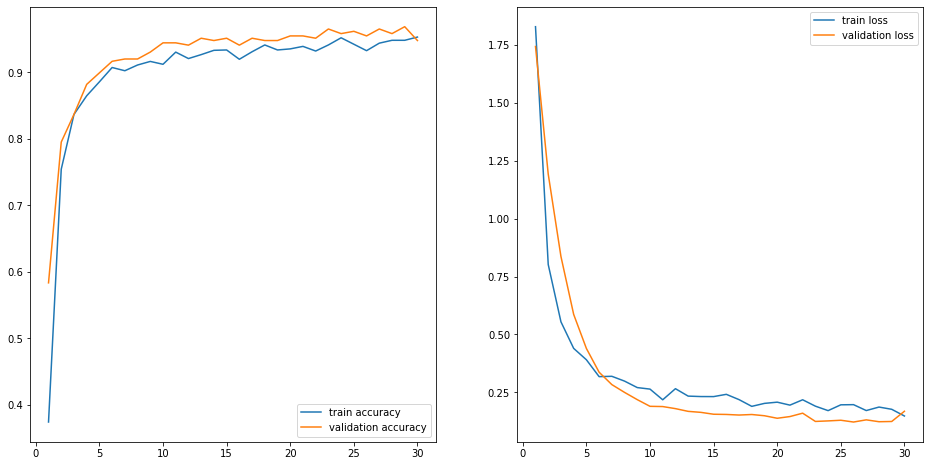

In [88]:
plot_loss_curve(history_1)

In [89]:
loaded_model = tf.keras.models.load_model(FILEPATH)

In [90]:
loaded_model.evaluate(test_ds)

313/313 [==============================] - 3s 9ms/step - loss: 0.1439 - accuracy: 0.9578


[0.143876850605011, 0.9577999711036682]

In [103]:
prediction_probs = loaded_model.predict(test_ds)

In [125]:
tf.math.reduce_max(prediction_probs , axis = 1).numpy()

array([0.99586535, 0.9991129 , 0.99991333, ..., 0.988157  , 0.9994248 ,
       0.99878365], dtype=float32)

In [104]:
predictions = tf.math.argmax(prediction_probs, axis = 1).numpy()

In [117]:
image_list = []
label_list = []
for image , label in tfds.as_numpy(ds_test):
  image_list.append(tf.squeeze(image))
  label_list.append(label)

In [126]:
pred_df = pd.DataFrame({'image':image_list,
                        'label':label_list,
                        'preds':predictions,
                        'pred_probs':tf.math.reduce_max(prediction_probs , axis = 1).numpy()})

In [128]:
pred_df['correct'] = pred_df['label'] == pred_df['preds']

In [133]:
mask = pred_df['correct'] == False
worst_preds = pred_df[mask].sort_values(by = 'pred_probs' , ascending = False).head(100)

In [134]:
worst_preds

,image,label,preds,pred_probs,correct
4716,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",8,4,0.998275,False
9186,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",5,0,0.994322,False
3119,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",8,4,0.993248,False
372,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",2,7,0.990920,False
924,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",3,7,0.989251,False
...,...,...,...,...,...
6415,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",8,6,0.794646,False
3795,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",6,5,0.793700,False
5929,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",4,3,0.791005,False
8627,"((tf.Tensor(0, shape=(), dtype=uint8), tf.Tens...",1,2,0.790757,False


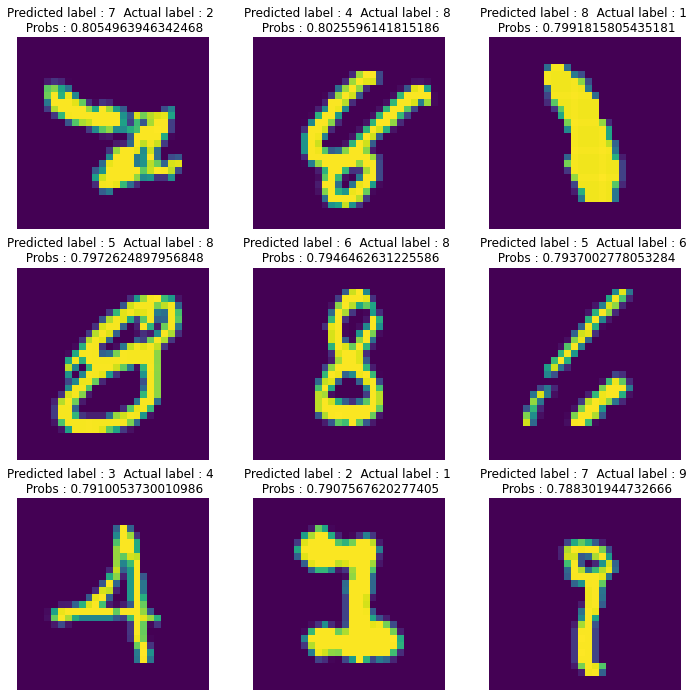

In [140]:
random_index = random.randint(0,91)

plt.figure(figsize = (12,12))
for plot_index , df_index  in enumerate(range(random_index,random_index+9),1):
  plt.subplot(3,3, plot_index)
  plt.title(f"Predicted label : {worst_preds.iloc[df_index]['preds']}  Actual label : {worst_preds.iloc[df_index]['label']} \n Probs : {worst_preds.iloc[df_index]['pred_probs']}")
  plt.imshow(worst_preds.iloc[df_index]['image'])
  plt.axis(False)